In [120]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from matplotlib import style
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.colors
import plotly.express as px

# Overview

EDA exploration

I'd like to go snowboarding somewhere next year with a bunch of friend and I like to know how Kms are there by ski resort and few more thing to keep in mind. Firs of all, I want to work with data for knowing more about this niche.

My analysis is based by many countries, principaly between Europe and North America. Mostly, I have gotten one dataset from Kaggle and I scraped twice www.skiresort.info bewsite to get as much information as many 3000 ski resort. Now I want to explain how the distribution has been splited.

The data has details about Location, Altitude, Slope Kms, Price, and many quantifiers insight about, size, reliability of snow, Gastronomy and so.

# 1. Clustering Data

2. ## Data Cleaning 

   * ### Dealing with missing values
    
      *  Notes 

      * Other missing values 

3. ## Exploratory Data Analysis 

   * ### Where are all the Ski Resorts? 

   * ### Where are the highest ski resorts? 

   * ### What is the distribution of easy, intermediate and advanced runs? 

   * ### How many of all resorts have less than 20 km of skiable terrain in each ability level? 

4. ## Conclusion

   * ### Additional features I would like to see with this dataset 

   * ### Other questions that would be interesting to investigate. 

# 1. Clustering Data

I upload two doc with some information about how I have worked with webscrapping on the page I mentioned before.
- Avalanches
- Rates

In [121]:
#Here we upload first dataset from Kaggle
df1 = pd.read_csv('data/skiResort_2.csv',sep=';')


In [122]:
#Here upload the second dataset got from webscrapping on the page skiresort.info
free = pd.read_csv('data/Freeride_EU_rank.csv',index_col = 'Unnamed: 0')


In [123]:
#Here upload the third dataset got from webscrapping on the page skiresort.info
stars = pd.read_csv('data/reviewskiresort_EU.csv', index_col='Unnamed: 0')


In [124]:
#Get together both dataset from webscrapping on URL that i set it up before to get the same column 
df2 = pd.merge(stars,free, on= 'URL', how='outer')


In [125]:
#Get together last dataset to the main one by URL column 
skiresorts = pd.merge(df2,df1,  on='URL', how='outer')


# 2. Data Cleaning

    ###   Dealing with missing values
    
    A number of few missing values needs to be checked. In this case there were many NaN values in the rates columns, but I try to deleted as low as I could becasue I needed the majority. 
    
    Where I saw that column need to be filled i did it. I used the mean of three important rows, to get the mean rate for each Ski Resort, and I filled with random number between min, max of the mean of the same row. I did this step, just in case the row didn't contain anything.

In [126]:
#Fill in the NaN of the NameResort column with the values of the Resort Name column
skiresorts['NameResort'].fillna(skiresorts['Resort Name'], inplace=True)

#Fill in the NaN of the Freeride column with the old column.
skiresorts['Km Freeride'].fillna(skiresorts['Advanced skiers, freeriders '], inplace=True)

#Fill in the Nan from the conuntry column with those from the state column so that there are no nulls.
skiresorts['Country'].fillna(skiresorts['State/Province'], inplace=True)

#Fill the Rate column with the Ski resort ski data so that there are no null values.
skiresorts['Rate'].fillna(skiresorts['Ski resort size '].str.replace(',','.'), inplace=True)

#Fill in the State column with the Country data so that there are no null values
skiresorts['State/Province'].fillna(skiresorts['Country'], inplace=True)

#Fill in null values by 0,s
skiresorts.loc[:, ['Easy', 'Intermediate ', 'Difficult']] = skiresorts.loc[:, ['Easy', 'Intermediate ', 'Difficult']].fillna('0,0')



    ### Other missing values

In [127]:
#Delete the repeat column and I get the only ones i want for the analysis
skiresorts.drop(['Resort Name','Aerial tramway/reversible ropeway', 'Rope tow/beginner lift',
       'People mover', 'Combined installation (gondola and chair)',
       'Cog railway', 'Helicopter for Heli-skiing',
       'Snow caterpillars for Cat-skiing','Advanced skiers, freeriders ','Funicular',
       'Circulating ropeway/gondola lift', 'Chairlift',
       'T-bar lift/platter/button lift ', 'Sunkid Moving Carpet','Slope preparation ','Friendliness of staff ','Youth', 'Child'], axis = 1, inplace=True)

    ### Clustering the data I want for analysis

In [128]:
#Got only European values that these are we will work with 
skiresort_EU = skiresorts.drop(skiresorts[skiresorts['Continent']!='Europe'].index)
skiresort_EU.reset_index(drop='index',inplace=True)


    ### Replace , by . for get all of them to numeric values (int or float)

In [129]:
#Convert values , to . for working with them 
skiresort_EU['Adult'] = [float(x.replace(',','.')) for x in skiresort_EU['Adult']]
skiresort_EU['Altitude'] = [float(x.replace(',','.')) for x in skiresort_EU['Altitude']]
skiresort_EU['Easy'] = [float(x.replace(',','.')) for x in skiresort_EU['Easy']]
skiresort_EU['Intermediate '] = [float(x.replace(',','.')) for x in skiresort_EU['Intermediate ']]
skiresort_EU['Difficult'] = [float(x.replace(',','.')) for x in skiresort_EU['Difficult']]
skiresort_EU['Rate'] = pd.to_numeric(skiresort_EU['Rate'])

columns = ['Ski resort size ',
       'Slope offering, variety of runs ', 'Lifts and cable cars ',
       'Snow reliability ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ']

#Replace , by . 
skiresort_EU[columns] = skiresort_EU[columns].apply(lambda x: x.str.replace(',','.'))

In [130]:

#Convert to float all columns whic are number and leave NaN which not allow to get convert themself
def convert_to_numeric(columns):
       skiresort_EU[columns] = skiresort_EU[columns].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

convert_to_numeric(['Ski resort size ',
       'Slope offering, variety of runs ', 'Lifts and cable cars ',
       'Snow reliability ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ','Km Freeride'])

    ### Calculate all the currency from diferent countries

In [131]:
def multiply(row):
    """
    This funtion multiply each value form Adult column by each value itself, and get as result 
    Euros currency to opeate with them.

    In addition, return values already multiply and add them to same column 
    """
    if row['Currency'] == 'Czech koruna':
        return row['Adult'] * 0.042
    elif row['Currency'] == 'Norwegian krone':
        return row['Adult'] * 0.093
    elif row['Currency'] == 'Polish zloty':
        return row['Adult'] * 0.21
    elif (row['Currency'] == 'Swedish krona') & (row['Adult'] > 80):
        return row['Adult'] * 0.089
    elif row['Currency'] == 'UK Pound':
        return row['Adult'] * 1.13
    elif row['Currency'] == 'Bulgarian Lev':
        return row['Adult'] * 0.51
    elif row['Currency'] == 'Romanian leu':
        return row['Adult'] * 0.20
    elif row['Currency'] == 'Bosnia convertible mark':  
        return row['Adult'] * 0.006
    elif row['Currency'] == 'Icelandic krona':
        return row['Adult'] * 0.0065
    elif row['Currency'] == 'Hungarian forint':
        return row['Adult'] * 0.0024
    else:
        return row['Adult']

        
skiresort_EU['Adult'] = skiresort_EU.apply(multiply, axis=1)

    ### Clustering data again for getting cleaner than before.

In [132]:
#Replace all values by European euro for deleting in a few steps

skiresort_EU = skiresort_EU.replace({
    'Swiss Franc': 'European Euro',
    'Norwegian krone': 'European Euro',
    'Czech koruna': 'European Euro',
    'Polish zloty': 'European Euro',
    'Swedish krona': 'European Euro',
    'UK Pound': 'European Euro',
    'Romanian leu': 'European Euro',
    'Bosnia convertible mark': 'European Euro',
    'Icelandic krona': 'European Euro',
    'Hungarian forint': 'European Euro',
    'Bulgarian Lev': 'European Euro',
    '-': 'European Euro'
})
#He I have only de European Euro Currency I wanted, just for delete easily 
skiresort_EU = skiresort_EU.drop(skiresort_EU[skiresort_EU['Currency']!='European Euro'].index)
skiresort_EU.reset_index(drop='index',inplace=True)


In [133]:
#Delete the rows which contains NaN values in Rate column, because i checked also, and those values don't have infomation on the website, so we don't need for analisys.
skiresort_EU = skiresort_EU.drop(skiresort_EU[pd.isnull(skiresort_EU['Rate'])].index)
skiresort_EU.reset_index(drop='index', inplace=True)

        ### Filling NaN values

In [134]:
#Get a column with mean values between three important columns of each ski resort, which have number to calculate with themself to get the mean. That mean is reliable becasue those values follow the rate of Ski Resort
skiresort_EU['mean'] = skiresort_EU.apply(lambda row: row[14:17].mean(), axis=1)

#New column with sum of three difficulties of slopes
skiresort_EU['Kms'] = skiresort_EU.apply(lambda row: row[9:12].sum(),axis=1)

    ### Fill the NaN values with random values in each column of every row with random values.

In [135]:
# Iterate by every column of this variable and I apply in each NaN value a random number between mean- 0.5 and mean + 0.5.
columns2 = ['Snow reliability ', 'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Mountain restaurants, ski huts, gastronomy ', 'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Snow parks ',
       'Cross-country skiing and trails ']


for column in columns2:
    mean = skiresort_EU.iloc[:,14:17].mean().mean()
    skiresort_EU[column] = skiresort_EU[column].apply(lambda x: np.random.uniform(mean-0.5, mean+0.5) if np.isnan(x) else x)

In [136]:
#Drop NaN values
skiresort_EU = skiresort_EU.drop(skiresort_EU[pd.isnull(skiresort_EU['Beginners '])].index)

    ### Change the name of columns and delete

In [137]:
#Change the name of column for reading them easily
skiresort_EU.rename(columns = {'NameResort':'Resort Name', 'Stars':'Freeride', 'Km Freeride':'Freeride Kms', 'Cross-country skiing and trails ':'Cross-Country',
                            'Mountain restaurants, ski huts, gastronomy ':'Restaurants and Gastronomy','Orientation (trail map, information boards, sign-postings) ':'Trail maps and signs',
                            'Slope offering, variety of runs ':'Slope offering','Lifts and cable cars ':'Lifts and gondolas','Ski resort size ':'Ski resort size',
                                'Snow reliability ':'Snow reliability','Access, on-site parking ':'On-site parking','Cleanliness and hygiene ':'Cleanliness and hygiene',
                                'Environmentally friendly ski operation ':'Environmentally friendly ski operation','Après-ski ':'Apres-ski',
                                'Families and children ':'Families and children','Beginners ':'Beginners','Snow parks ':'Snow parks','Rate':'Ski Resort Rate','Adult':'Price'},inplace=True)

#Delete the columns I dont need
skiresort_EU.drop(['Accommodation offering directly at the slopes and lifts ','URL','mean','Currency'],axis=1,inplace=True)

In [138]:
#Change the order of the Columns 
new_reloc = ['Resort Name','Continent', 'Country', 'State/Province','Ski Resort Rate','Altitude', 'Easy',
       'Intermediate ', 'Difficult','Kms', 'Price','Freeride', 'Freeride Kms','Ski resort size',
       'Slope offering', 'Lifts and gondolas', 'Snow reliability',
       'On-site parking', 'Trail maps and signs', 'Cleanliness and hygiene',
       'Environmentally friendly ski operation', 'Restaurants and Gastronomy',
       'Apres-ski', 'Families and children', 'Beginners', 'Snow parks',
       'Cross-Country']

skiresort_EU = skiresort_EU.reindex(columns = new_reloc).round(2).reset_index(drop='index')

    ### Fill NaN values in price Column

In [139]:
#Apply for 0 values in Price column a random number between 60,90 if Rate is more than 3 and 15,27 between is Rate is lower than 3
random.seed(200)
def randomizar(row):
    if row['Ski Resort Rate'] >= 3 and row['Price'] == 0:
        return random.uniform(60, 90)
    elif row['Ski Resort Rate'] < 3 and row['Price'] == 0:
        return random.uniform(15, 27)
    else:
        return row['Price']

skiresort_EU['Price'] = skiresort_EU.apply(randomizar, axis=1)


# 2. Exploratory Data Analisys


In [140]:
# Open Csv that it is already cleaned for analysis.
ski_EU = pd.read_csv('data/skiresort_EU.csv', index_col='Unnamed: 0')
ski_EU

,Resort Name,Continent,Country,State/Province,Ski Resort Rate,Altitude,Easy,Intermediate,Difficult,Kms,...,On-site parking,Trail maps and signs,Cleanliness and hygiene,Environmentally friendly ski operation,Restaurants and Gastronomy,Apres-ski,Families and children,Beginners,Snow parks,Cross-Country
0,KitzSki – Kitzbühel/Kirchberg,Europe,Austria,Tyrol (Tirol),4.9,2000.0,101.0,61.0,17.0,179.0,...,4.00,5.00,5.00,4.00,5.00,4.00,5.00,5.00,5.00,5.00
1,Ischgl/Samnaun – Silvretta Arena,Europe,Austria,Tyrol (Tirol),4.8,2872.0,47.0,142.0,49.0,238.0,...,4.00,5.00,5.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00
2,SkiWelt Wilder Kaiser-Brixental,Europe,Austria,Tyrol (Tirol),4.8,1957.0,122.0,129.0,33.0,284.0,...,5.00,4.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00
3,St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth...,Europe,Austria,Tyrol (Tirol),4.8,2811.0,132.0,123.0,50.0,305.0,...,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,4.00,4.00
4,Serfaus-Fiss-Ladis,Europe,Austria,Tyrol (Tirol),4.8,2820.0,47.0,123.0,28.0,198.0,...,4.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,zugerberg,Europe,Switzerland,Central Switzerland,1.0,940.0,0.2,0.0,0.0,0.2,...,1.99,1.94,1.71,1.48,2.06,1.60,1.41,2.00,2.25,1.71
2624,zum-zeri-passo-dei-due-santi,Europe,Italy,Tuscany (Toscana),1.9,1588.0,1.5,5.3,1.2,8.0,...,2.02,2.18,2.20,2.10,1.88,2.09,1.45,1.64,1.90,1.38
2625,zvicina,Europe,Czech Republic,Hradec Kralove Region (Kralovehradecky kraj),1.3,710.0,1.5,0.7,0.0,2.2,...,1.71,1.41,1.80,2.01,2.07,2.00,1.93,1.91,2.02,1.67
2626,zwoelferhorn-st-gilgen,Europe,Austria,Salzburg (Salzburger Land),2.0,1522.0,1.0,5.0,1.0,7.0,...,1.90,2.25,2.27,1.77,2.15,1.95,2.19,2.34,2.30,1.75


## Where are all Ski Resort?

Lets see where are the all resort and how many resort has each country.

In [141]:
#Open anothe dataset with all data from every Continent
skiresorts_pure = pd.read_csv('/Users/migueldefrutos/Documents/Bootcamp/Data_Bridge /Alumno /ds_thebridge_11_22/Entregas/EDA/Clean_Data/skiresort_pure.csv', index_col='Unnamed: 0')

#Number of ski resort by country mundialy
skiresort_country = skiresorts_pure.groupby(['Continent','Country'])[['NameResort']].count().sort_values(by = 'NameResort',ascending=False)

#Get the first 5 Country with the most values of resorts
skiresort_country['Percent'] = round((skiresort_country['NameResort']/skiresort_country['NameResort'].sum())*100,2)
print('Los 5 principales Paises del mundo reprentan el', skiresort_country['Percent'][0:5].sum(),'%')

Los 5 principales Paises del mundo reprentan el 47.53 %


In [142]:
skiresort_country.reset_index(inplace=True)
print('Europa respresenta el' ,skiresort_country[skiresort_country['Continent'] == 'Europe']['Percent'].sum().round(2), '%', 'frente al resto del Mundo')

Europa respresenta el 65.3 % frente al resto del Mundo


In [143]:
#SUM of percent by resort from every country
skiresort_continent = skiresort_country.groupby('Continent')['Percent'].sum()

In [144]:
#Create a pie chart with suma of percent by Continent
continent = px.pie(skiresort_continent, values=skiresort_continent.values, names=skiresort_continent.index,color_discrete_sequence=px.colors.sequential.Blues)
continent.update_traces(textposition='inside', textinfo='percent+label',pull=[0, 0,0, 0,0,0,0,0,0,0,0,0,0])
continent.update_layout(title_text='Resorts by Countries', width=800,height=600)
continent.show()

In [145]:
# Convert to numerica Different slopes
skiresorts_pure['Easy'] = [float(x.replace(',','.')) for x in skiresorts_pure['Easy']]
skiresorts_pure['Intermediate '] = [float(x.replace(',','.')) for x in skiresorts_pure['Intermediate ']]
skiresorts_pure['Difficult'] = [float(x.replace(',','.')) for x in skiresorts_pure['Difficult']]

#Create new column with Total Kms skiables
skiresorts_pure['Total Kms'] = skiresorts_pure.loc[:,'Easy':'Difficult'].sum(axis=1)


In [146]:
kmsby_continent = skiresorts_pure.groupby('Continent')[['Easy','Intermediate ','Difficult','Total Kms']].sum().sort_values(by = 'Total Kms',ascending = False)
kmsby_continent.reset_index(inplace=True)

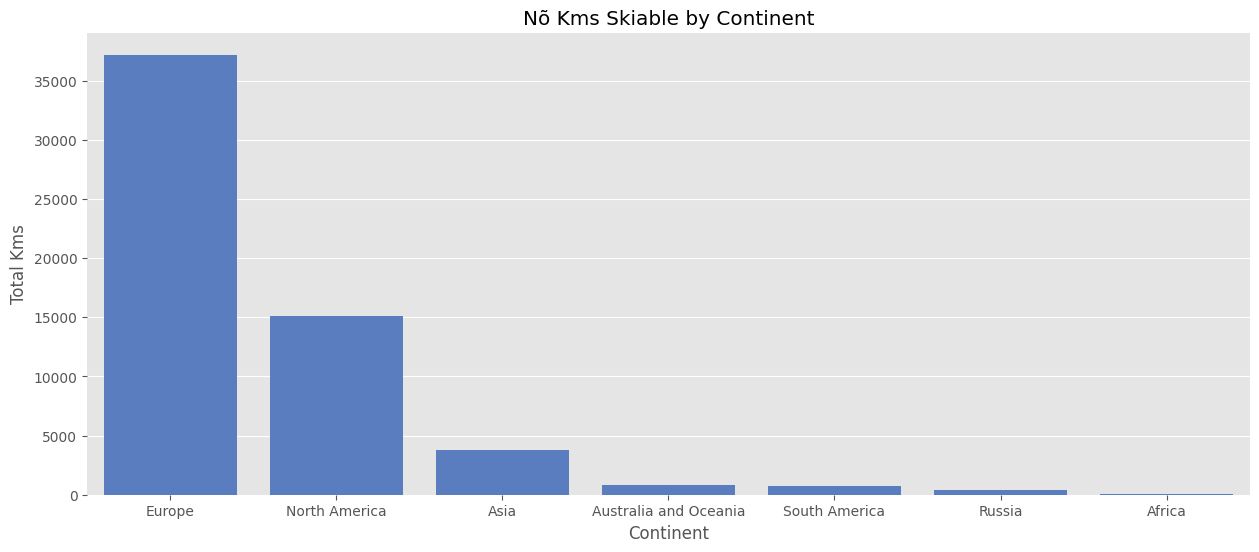

In [147]:
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Continent", y="Easy", data=kmsby_continent,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Continent", y="Total Kms", data=kmsby_continent,
            label="High gdp", color="b")
plt.title('Nõ Kms Skiable by Continent')
sns.despine(left=True, bottom=True)

    ## By Country in Europe

In [93]:
# Grouping Ski resort by country
resort_bycountry = ski_EU.groupby('Country')[['Resort Name']].count().sort_values(by='Resort Name', ascending=False)

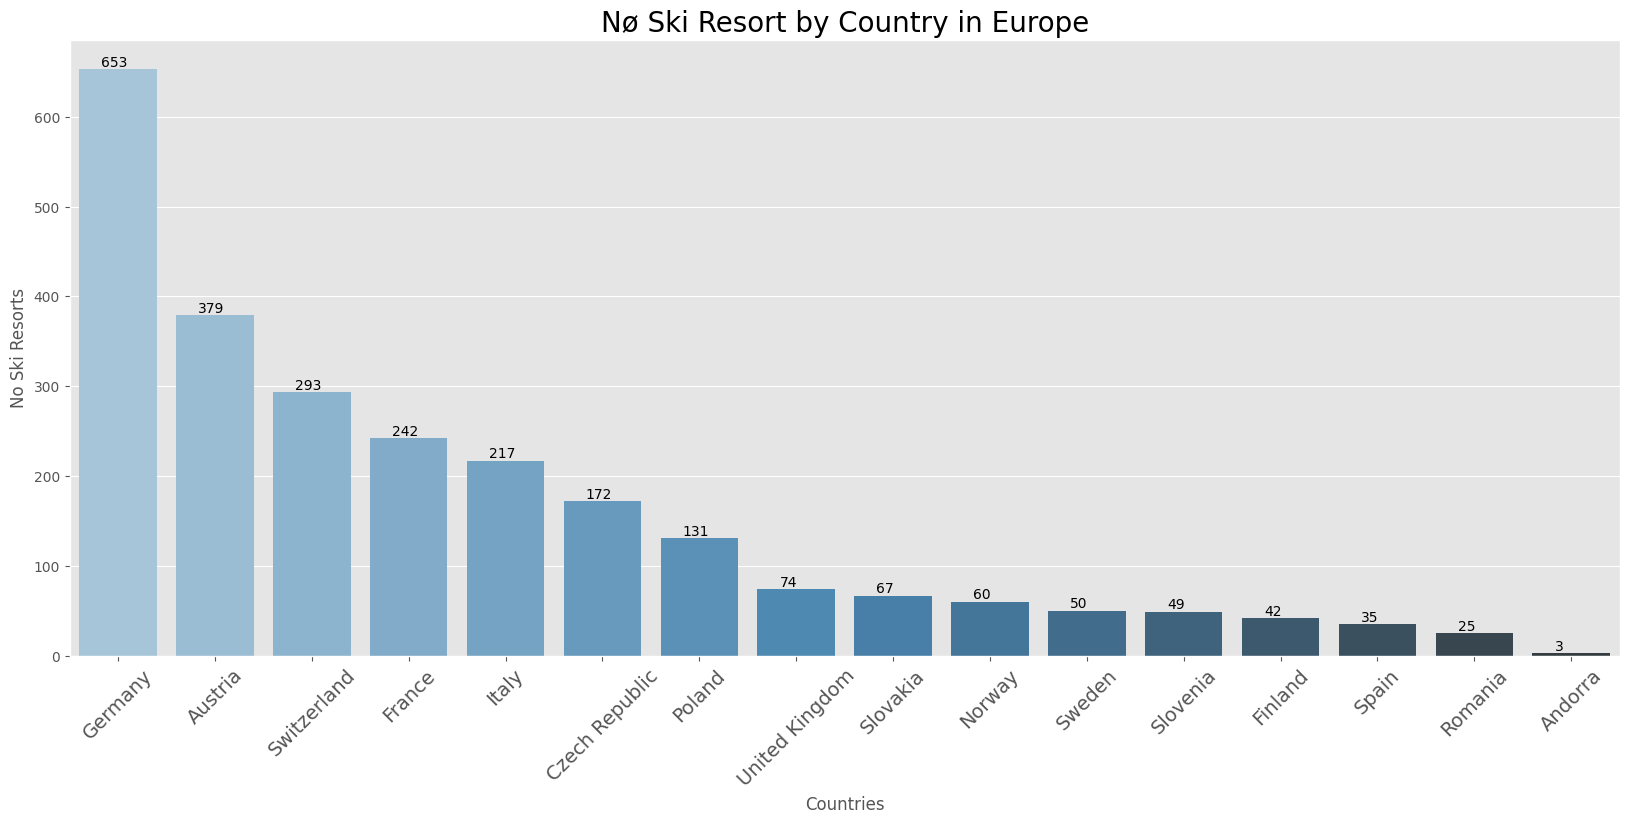

In [117]:
#Show the number of ski resort there are in each Country
style.use('ggplot')
plt.figure(figsize=(20,8))
barplot=sns.barplot(x=resort_bycountry.index,
            y=resort_bycountry['Resort Name'],
            palette="Blues_d",
           errorbar=None);

for bar in barplot.patches:
    # print(bar.get_height())
    altura_b = bar.get_height()
    # print(bar.get_x())
    x_b = bar.get_x()
    # print(bar.get_width())
    w_b = bar.get_width()
    plt.text(x_b + w_b/3.5 , altura_b, int(altura_b), va="bottom")

barplot.set(xlabel='Countries', ylabel='No Ski Resorts');
plt.title('Nø Ski Resort by Country in Europe', fontsize = 20)
plt.xticks(rotation =45, fontsize = 14);


    ##Correlacion between diferent values from test result by ski resort in Europe

In [115]:
#Show different corre=lacion between diferent numerric values 
Corr = ski_EU.corr()[['Ski Resort Rate','Altitude', 'Easy', 'Intermediate ','Difficult'  
       ,'Adult', 'Freeride', 'Freeride Kms', 'Ski resort size',
       'Slope offering','Restaurants and Gastronomy',
       'Apres-ski', 'Families and children', 'Beginners', 'Snow parks',
       'Cross-Country','Snow reliability']].round(2)

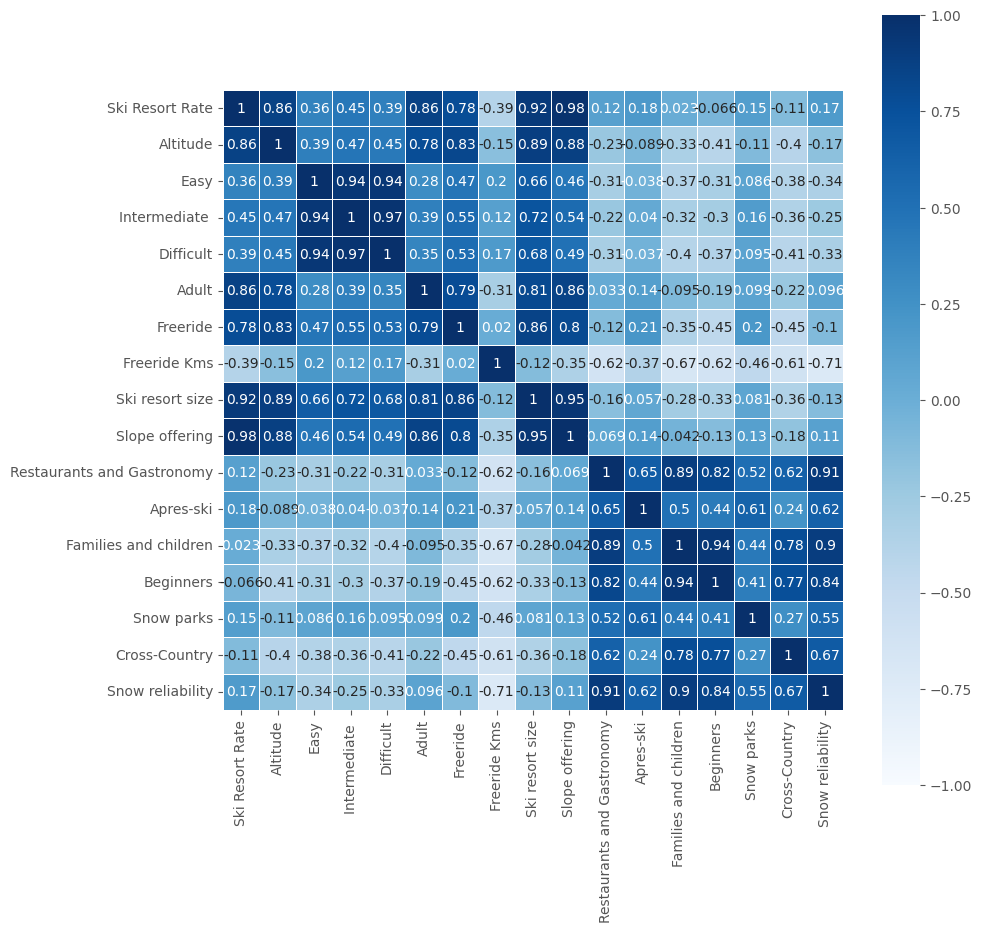

In [116]:
#Demostramos la correlacion que hay entre los valores numericos.
plt.figure(figsize=(10,10))
sns.heatmap(Corr.corr(),vmin=-1, vmax=1, center=0,
            cmap= sns.color_palette("Blues", as_cmap=True),
            square=True, linewidths=.5, annot=True);